# 時系列分解
時系列データは意図して作成された場合だと周期がある場合が多く、その場合「傾向変動」「季節変動」「不規則変動」の3つにわけることができ、逆に言えば3つを足すことで元の値に戻る。

本章では自己相関関数を自作して周期を計測し、Statsmodelsライブラリを使用することで時系列データを実際に分解する。
## ライブラリのインポート

In [1]:
from statsmodels import api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## データの読み込み

In [2]:
df = pd.read_csv("chingin.csv", encoding="shift-jis")
df.head()

,月,賃金指数
0,1,83.0
1,2,76.6
2,3,83.7
3,4,79.7
4,5,79.1


In [3]:
y = df["賃金指数"].values

## 自己相関関数を作成して自己相関係数を算出

In [4]:
tmpC = []
C = []
for h in range(len(y)):
    for t in range(len(y)-h):
        tmpC.append((y[t]-np.mean(y))*(y[t+h]-np.mean(y)))
    C.append(sum(tmpC)/len(y))
    tmpC = []
r = np.array(C) / C[0]

## 自己相関係数からコレログラムを出力

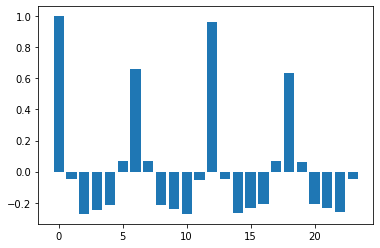

In [5]:
plt.bar(range(len(r))[0:24], r[0:24])
plt.show()

## 周期を算出

In [6]:
np.argmax(r[1:]) + 1

12

## 時系列データを3つに分解
ここで分解されるデータは以下のように表示される。
- 傾向変動　->Trend
- 季節変動　->Seasonal
- 不規則変動->Residual

In [7]:
TSR = sm.tsa.seasonal_decompose(y, period=np.argmax(r[1:])+1)#バージョンによって「freq」ではなく「period」

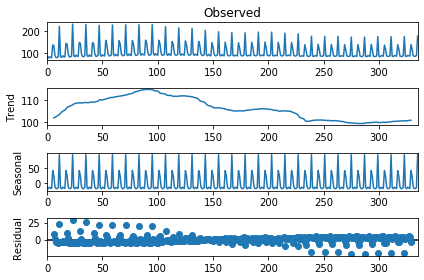

In [8]:
TSR.plot()
plt.show()

### 傾向変動を出力

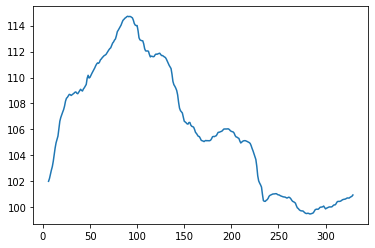

In [9]:
trend = TSR.trend
plt.plot(trend)
plt.show()

### 季節変動を出力

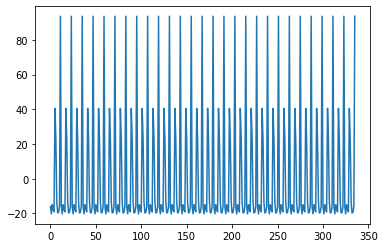

In [10]:
seasonal = TSR.seasonal
plt.plot(seasonal)
plt.show()

### 不規則変動を出力

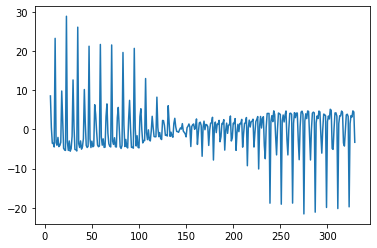

In [11]:
residual = TSR.resid
plt.plot(residual)
plt.show()